# MSDS 422 - Practical Machine Learning - Week 4 - Assignment

##### Author: Jason De Melo - 1/30/2022

### Research Question
#### What is the likelyhood of a company filing for bankruptcy?

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, RocCurveDisplay, f1_score, auc

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Load Data / Data Quality Review

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


Check on missing/invalid data

In [5]:
pd.isnull(data).values.any()

False

In [6]:
pd.isna(data).values.any()

False

#### Exploratory Data Analysis (EDA)

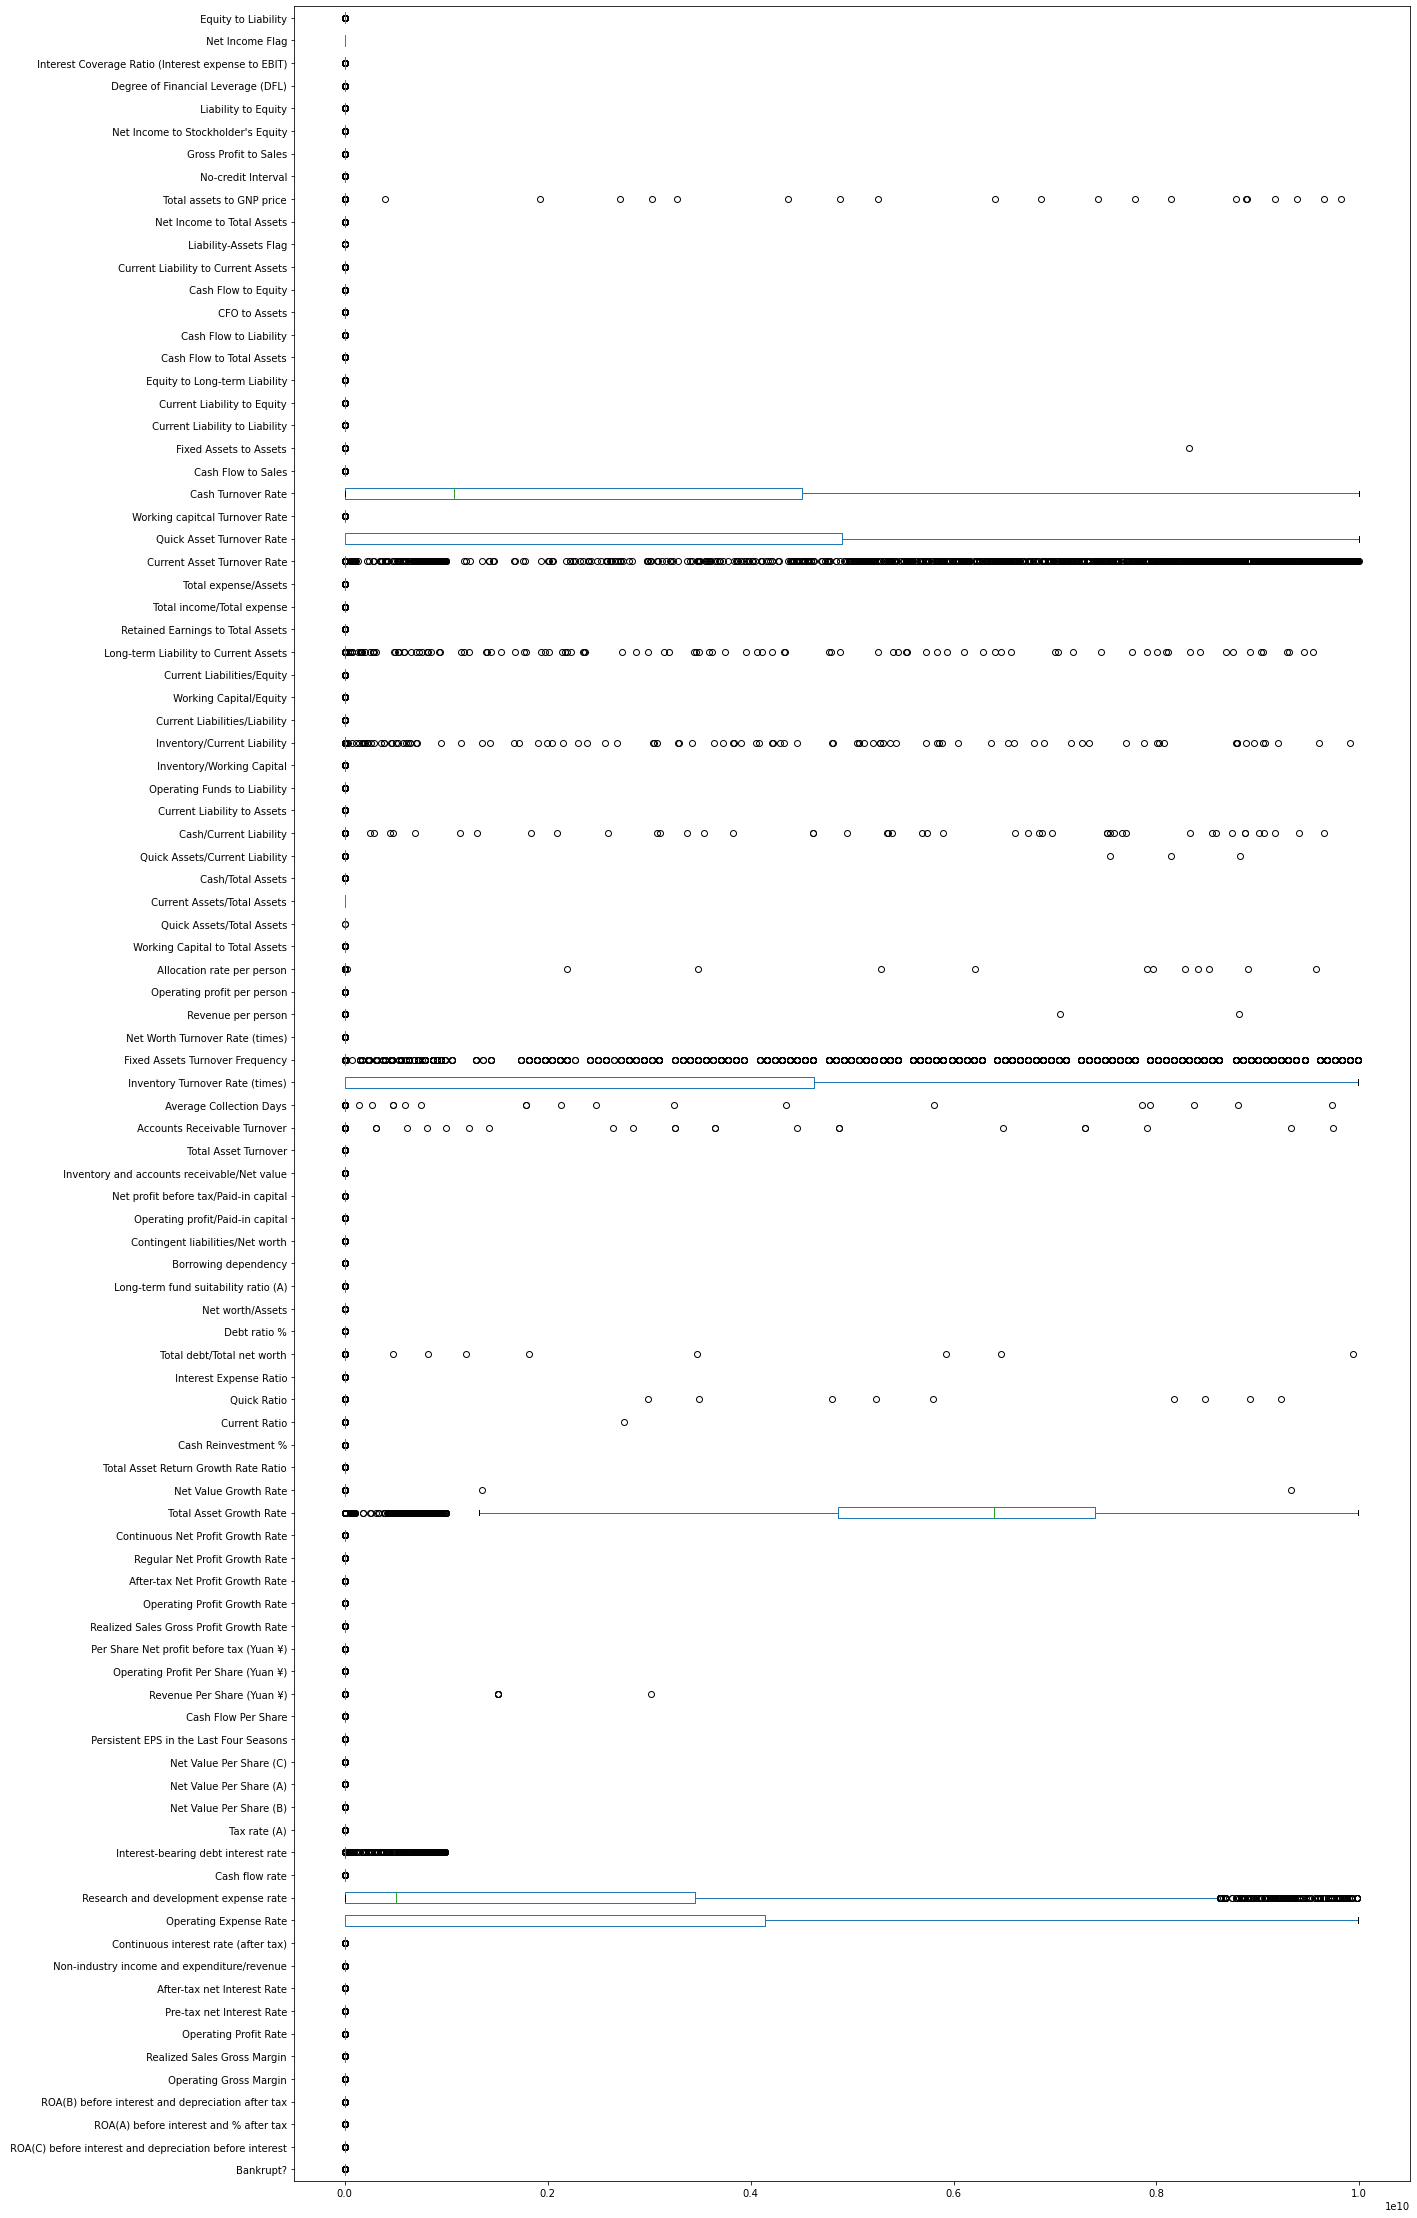

In [7]:
data.boxplot(vert=False, figsize=(20,40), grid=False);

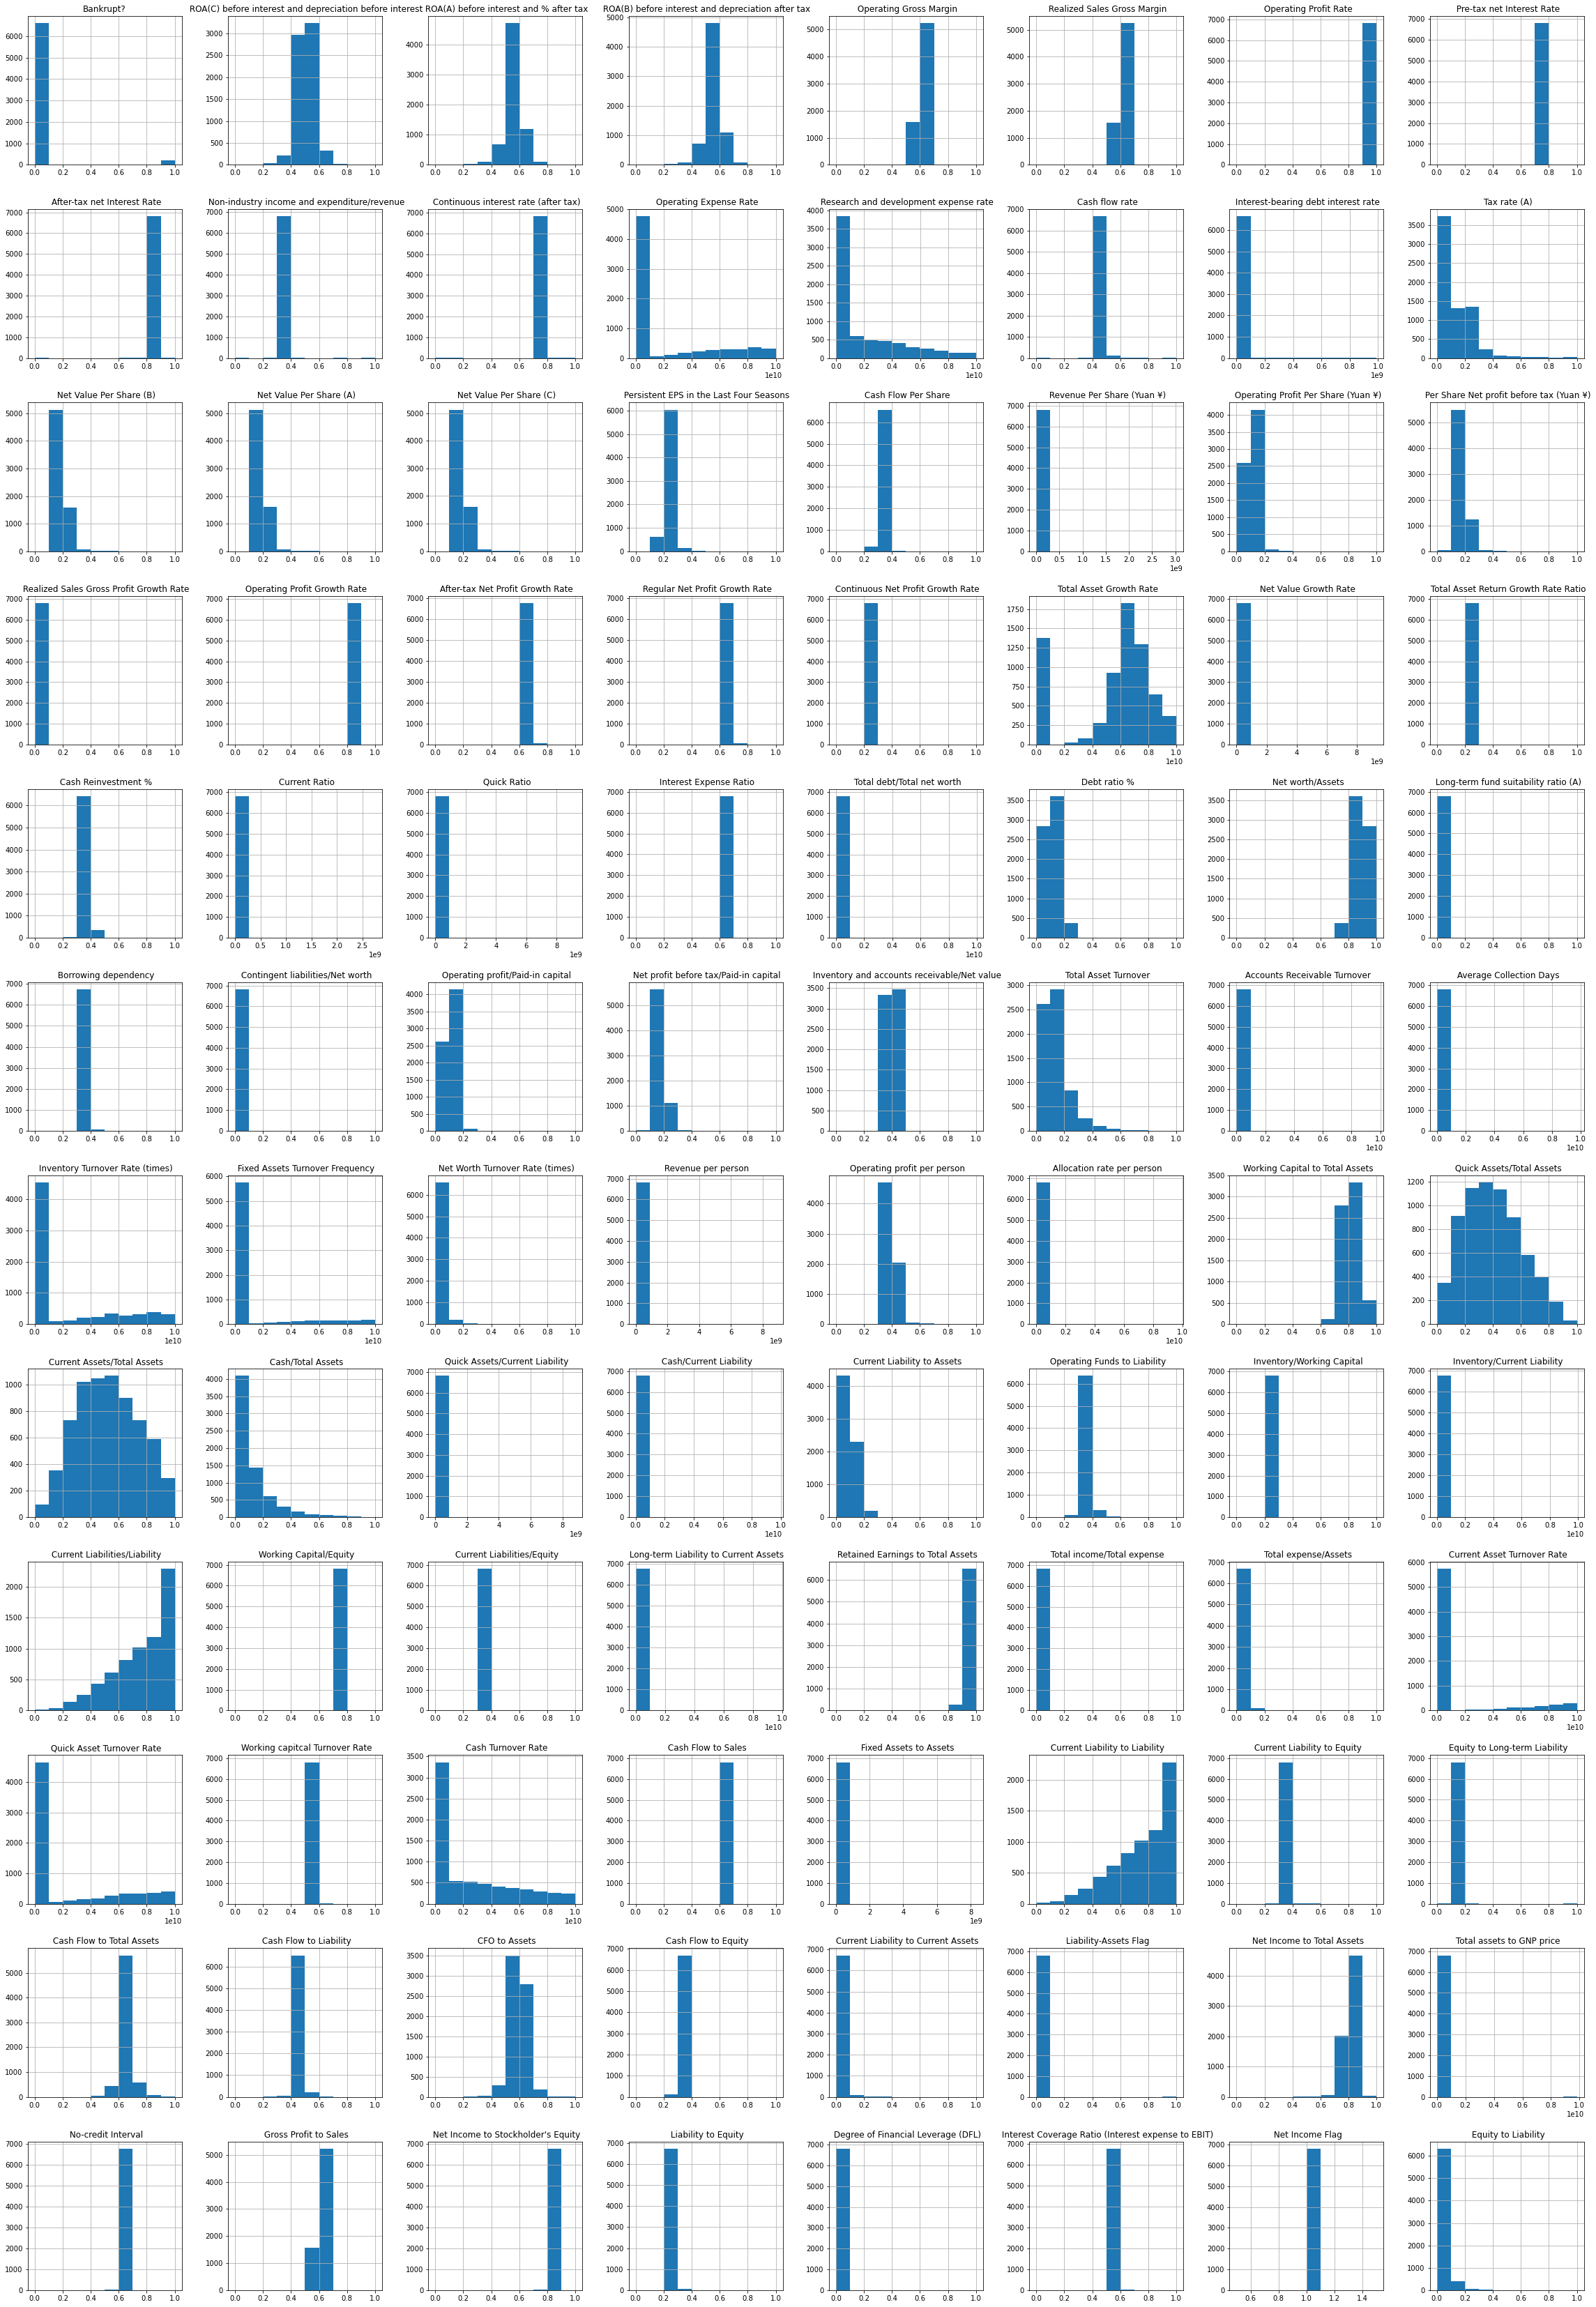

In [8]:
data.hist(figsize=(40,60), layout=(12,8));

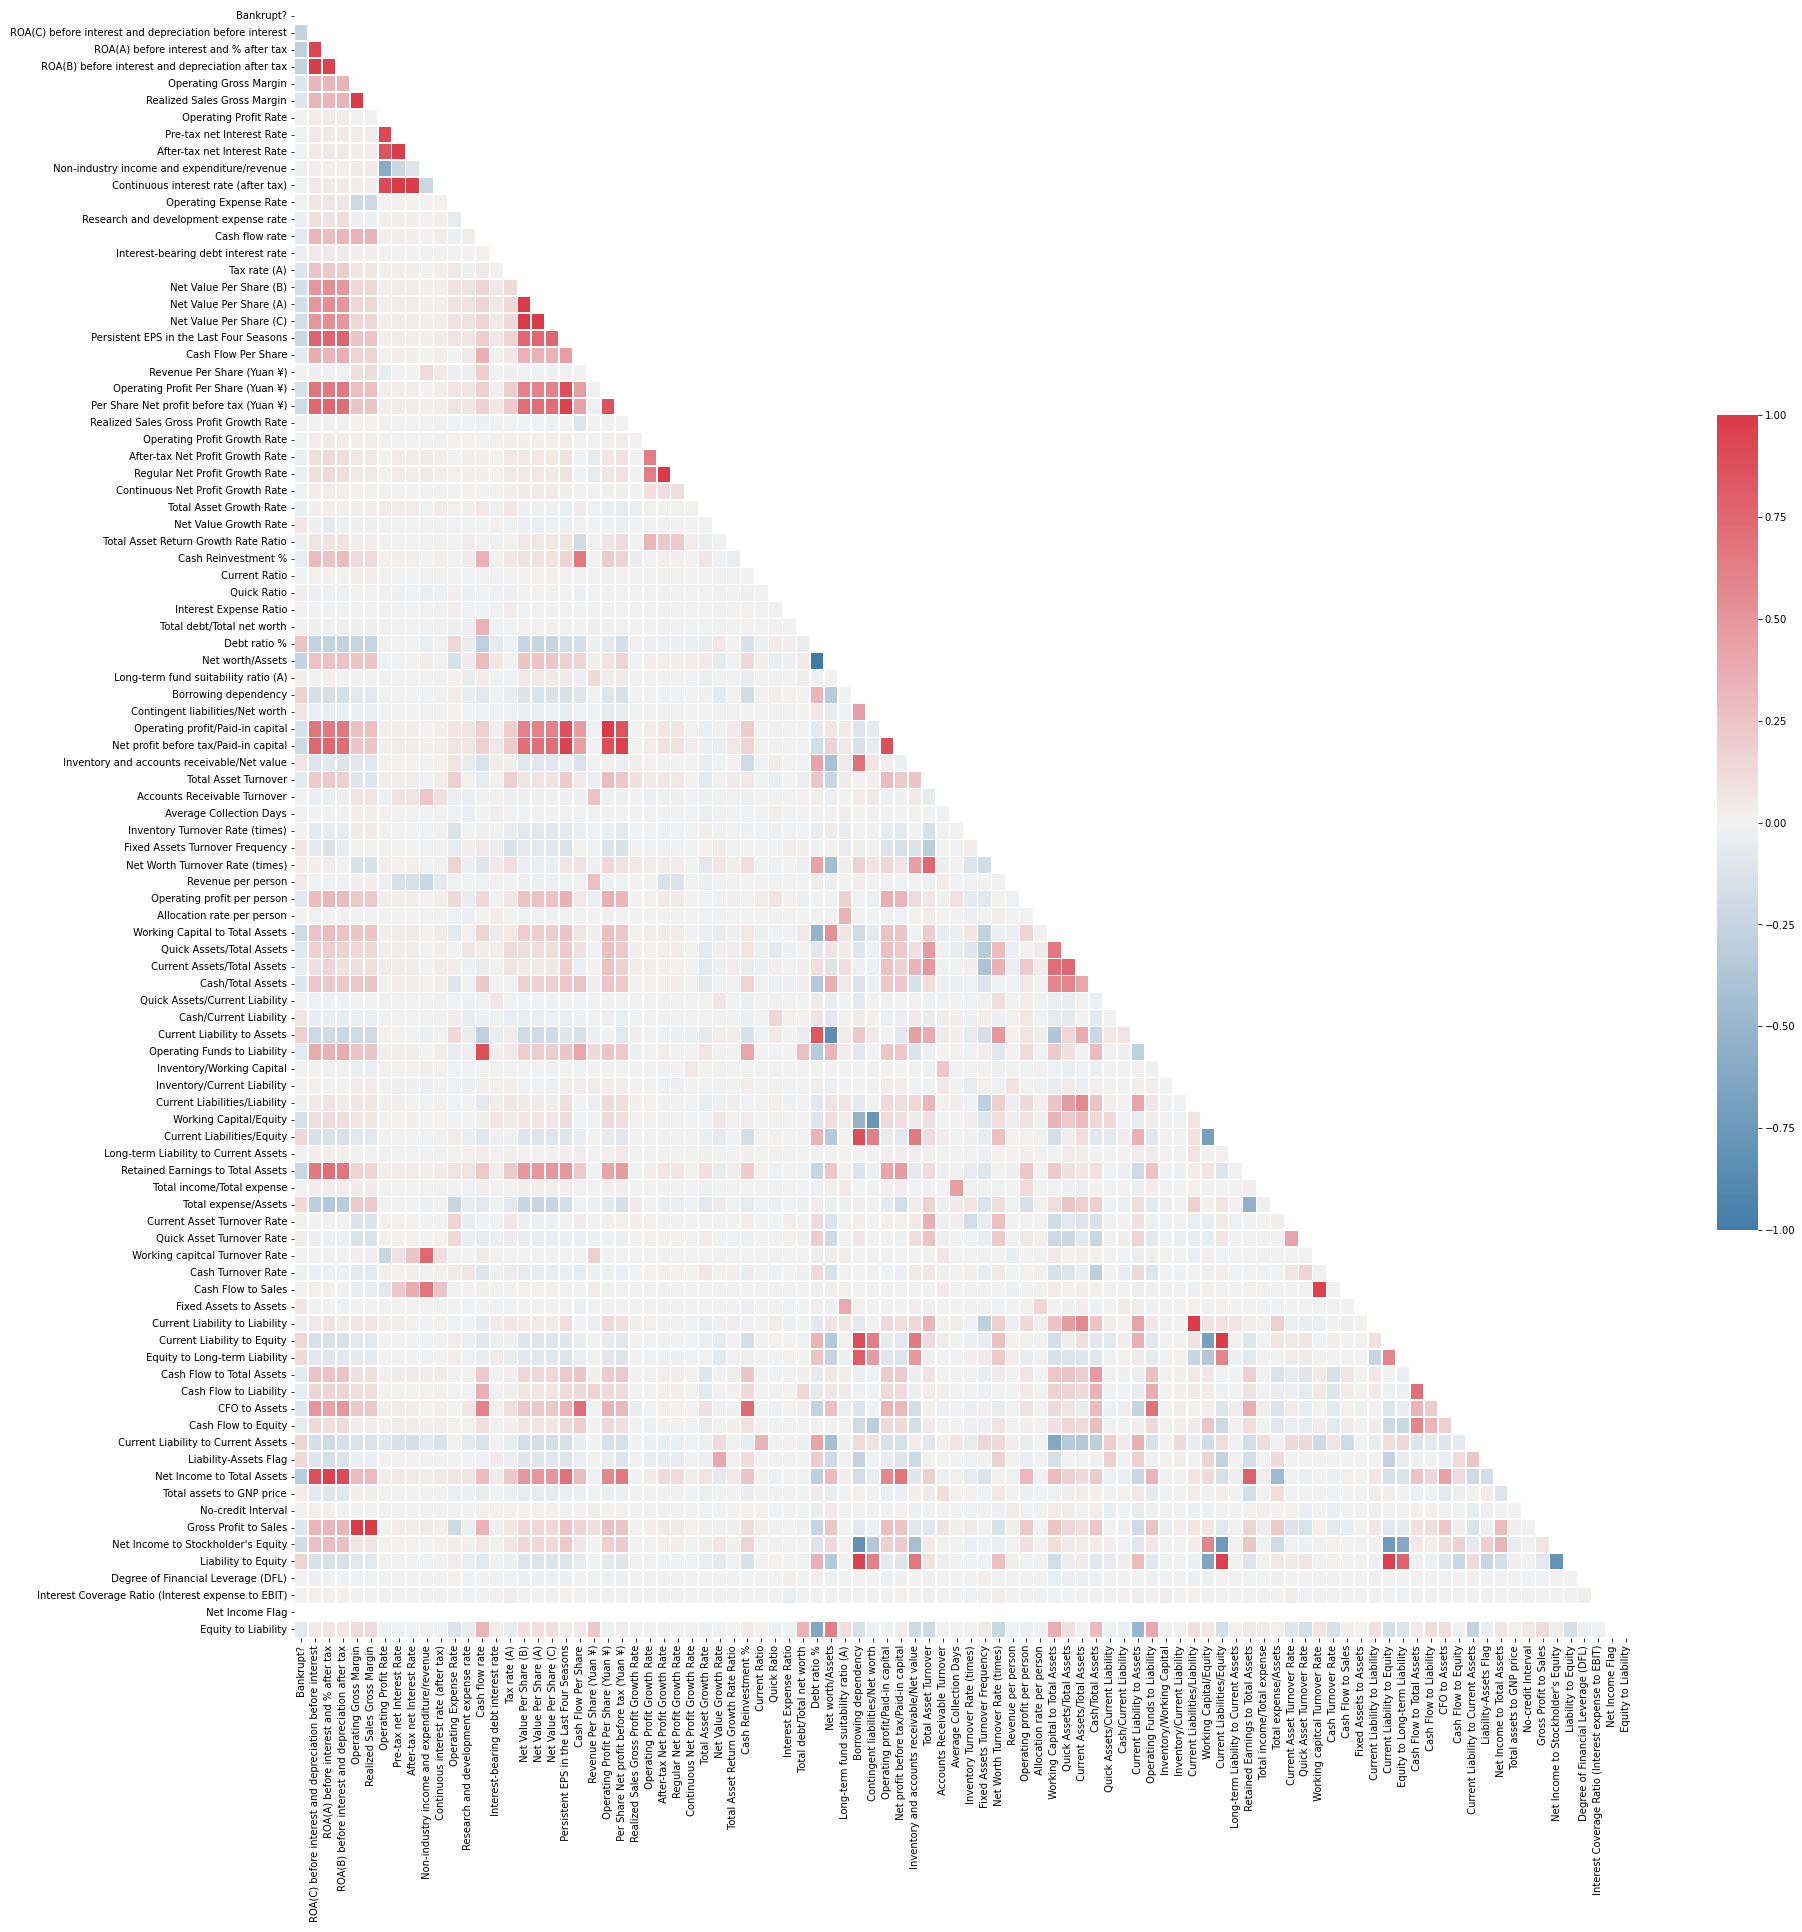

In [9]:
# Correlation matrix that measures the linear relationships
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
plt.figure(figsize=(30,30))
corr = data.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, linewidths=.5, center=0, mask=mask, cmap=sns.diverging_palette(240, 10, as_cmap=True), cbar_kws={'shrink' : .5});

#### Data Pre-processing

All the columns are numeric. No need to be concerned about dealing with categorical data. 

In [10]:
data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

The int types are the target variable (Bankrupt?), and the two flag columns.

It is worth explaining the meaning of the flag columns (extracted from <a href="https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction">Kaggle</a>):
<ul>
    <li><b>Liability-Assets Flag</b>: 1 if Total Liability exceeds Total Assets, 0 otherwise</li>
    <li><b>Net Income Flag</b>: 1 if Net Income is Negative for the last two years, 0 otherwise</li>
</ul>

In [11]:
data_groups = data.columns.to_series().groupby(data.dtypes).groups
for datatype in data_groups:
    print(f'Datatype {datatype}: {data_groups[datatype].to_list()}')

Datatype int64: ['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']
Datatype float64: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit

#### Separate the train and the test data

In [12]:
X = data.iloc[:, 1:].copy()
y = data.iloc[:, 0].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# No skill parameters
no_skill = len(y_test[y_test == 1]) / len(y_test)
probs_ns = [0 for _ in range(len(y_test))]
fpr_ns, tpr_ns, _ = roc_curve(y_test, probs_ns)
auc_ns = auc(fpr_ns, tpr_ns)

#### Logistic Regression Classifier

In [13]:
lr_param = [
    {'penalty' : ['l2', 'none'], 'solver' : ['newton-cg', 'lbfgs', 'sag'], 'max_iter' : [1000], 'random_state' : [100]},
    {'penalty' : ['l1', 'l2'], 'solver' : ['liblinear'], 'max_iter' : [1000], 'random_state' : [100]},
    {'penalty' : ['elasticnet'], 'solver' : ['saga'], 'l1_ratio' : np.linspace(0, 1, num=10), 'max_iter' : [1000], 'random_state' : [100]}
]
lr_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', GridSearchCV(estimator=LogisticRegression(), param_grid=lr_param, cv=10)),
])
lr_pipe.fit(X_train, y_train)
lr_pipe.score(X_test, y_test)

0.9611436950146628

In [14]:
lr_pipe['classifier'].best_estimator_

LogisticRegression(l1_ratio=1.0, max_iter=1000, penalty='elasticnet',
                   random_state=100, solver='saga')

In [15]:
# Calculate the parameters to assess the model
y_cvpred_lr = cross_val_predict(lr_pipe['classifier'].best_estimator_, X_test, y_test, cv=3)
y_scores_lr = cross_val_predict(lr_pipe['classifier'].best_estimator_, X_test, y_test, cv=3, method='decision_function')
#probs_lr = lr_pipe['classifier'].best_estimator_.predict_proba(X_test)
#precision_lr, recall_lr, _ = precision_recall_curve(y_test, probs_lr[:, 1]) # Use the probabilities for the positive outcome only
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_scores_lr)
y_pred_lr = lr_pipe['classifier'].best_estimator_.predict(X_test)
f1_lr = f1_score(y_test, y_pred_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
auc_lr = auc(fpr_lr, tpr_lr)

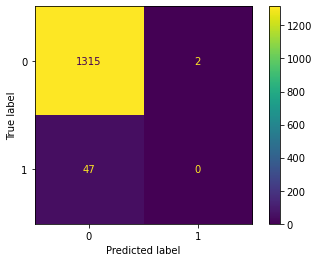

In [16]:
# Confusion Matrix
# The count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
cm_lr = confusion_matrix(y_test, y_cvpred_lr)
ConfusionMatrixDisplay(cm_lr).plot();

#### Support Vector Machine (SVM) Classifier

In [17]:
svm_param = [
    {'kernel' : ['linear', 'rbf', 'sigmoid'], 'max_iter' : [1000], 'random_state' : [100]},
]
svm_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', GridSearchCV(estimator=SVC(), param_grid=svm_param, cv=10))
])
svm_pipe.fit(X_train, y_train)
svm_pipe.score(X_test, y_test)

0.9633431085043989

In [18]:
# Calculate the parameters to assess the model
y_cvpred_svm = cross_val_predict(svm_pipe['classifier'].best_estimator_, X_test, y_test, cv=3)
y_scores_svm = cross_val_predict(svm_pipe['classifier'].best_estimator_, X_test, y_test, cv=3, method='decision_function')
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_scores_svm)
y_pred_svm = svm_pipe['classifier'].best_estimator_.predict(X_test)
f1_svm = f1_score(y_test, y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
auc_svm = auc(fpr_svm, tpr_svm)

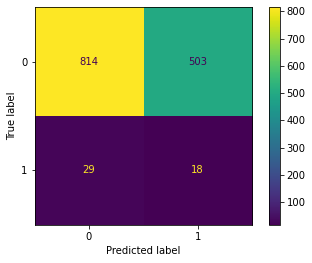

In [19]:
# Confusion Matrix
# The count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
cm_svm = confusion_matrix(y_test, y_cvpred_svm)
ConfusionMatrixDisplay(cm_svm).plot();

#### Naïve Bayes Classifier

In [20]:
nb_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', GaussianNB())
])
nb_pipe.fit(X_train, y_train)
nb_pipe.score(X_test, y_test)

0.8973607038123167

In [21]:
# Calculate the parameters to assess the model
y_cvpred_nb = cross_val_predict(nb_pipe['classifier'], X_test, y_test, cv=3)
y_scores_nb = cross_val_predict(nb_pipe['classifier'], X_test, y_test, cv=3, method='predict_proba')
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_scores_nb[:, 1]) # use probabilities for the positive outcome only
y_pred_nb = nb_pipe['classifier'].predict(X_test)
f1_nb = f1_score(y_test, y_pred_nb)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb[:, 1])
auc_nb = auc(fpr_nb, tpr_nb)

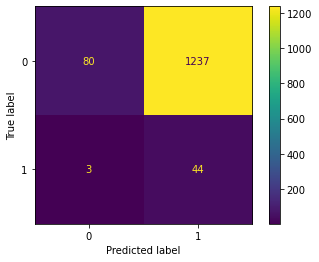

In [22]:
# Confusion Matrix
# The count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.
cm_nb = confusion_matrix(y_test, y_cvpred_nb)
ConfusionMatrixDisplay(cm_nb).plot();

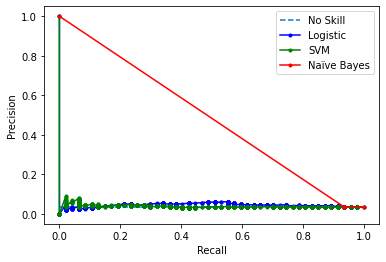

In [23]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall_lr, precision_lr, marker='.', linestyle='-', color='b', label='Logistic')
plt.plot(recall_svm, precision_svm, marker='.', linestyle='-', color='g', label='SVM')
plt.plot(recall_nb, precision_nb, marker='.', linestyle='-', color='r', label='Naïve Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend();


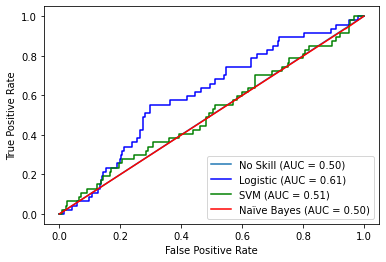

In [31]:
fig, ax = plt.subplots()
RocCurveDisplay(fpr=fpr_ns, tpr=tpr_ns, estimator_name='No Skill', roc_auc=auc_ns).plot(ax=ax);
RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr,  estimator_name='Logistic', roc_auc=auc_lr).plot(ax=ax, color='b');
RocCurveDisplay(fpr=fpr_svm, tpr=tpr_svm, estimator_name='SVM', roc_auc=auc_svm).plot(ax=ax, color='g');
RocCurveDisplay(fpr=fpr_nb, tpr=tpr_nb, estimator_name='Naïve Bayes', roc_auc=auc_nb).plot(ax=ax, color='r');

